In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import CSV

In [2]:
df = pd.read_csv("/Users/humzakhan/Metis/Metis_Projects/Metis_Project_3/Data/churn 3.csv")
df.shape

(10000, 14)

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# EDA

In [4]:
#Check for null values
df.isnull().values.any()

False

In [5]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

**2037 customers have left the bank**

In [9]:
#customers who left the bank
exit = df.loc[df['Exited'] == 1]

In [10]:
not_exit = df.loc[df['Exited'] == 0]

# Analysis of Categorical Variables

In [11]:
cat_variables = ["Geography","Gender","Tenure","NumOfProducts","HasCrCard","IsActiveMember","Exited"]

In [12]:
def category(variable):
    print(df[variable].value_counts())
    
    sns.countplot(df[variable])
    plt.show()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64


/Users/humzakhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


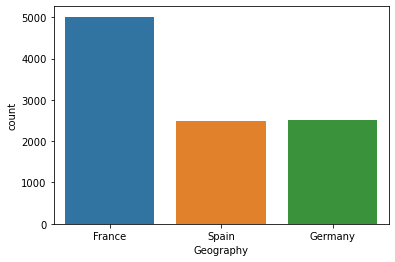

Male      5457
Female    4543
Name: Gender, dtype: int64


/Users/humzakhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


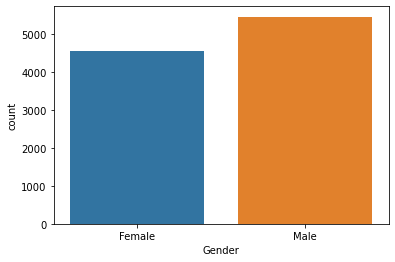

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64


/Users/humzakhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


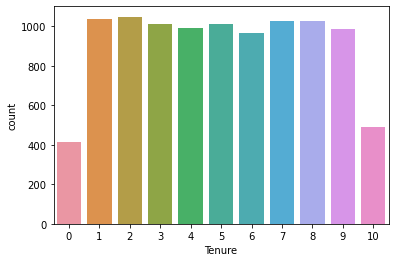

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64


/Users/humzakhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


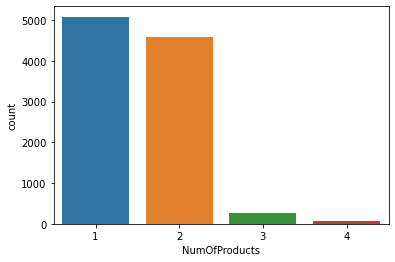

1    7055
0    2945
Name: HasCrCard, dtype: int64


/Users/humzakhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


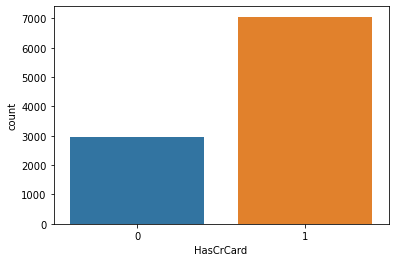

1    5151
0    4849
Name: IsActiveMember, dtype: int64


/Users/humzakhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


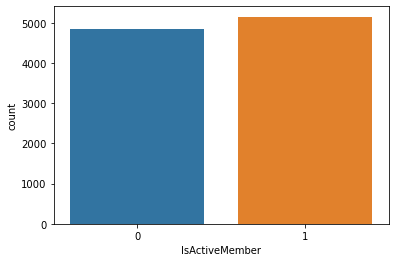

0    7963
1    2037
Name: Exited, dtype: int64


/Users/humzakhan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


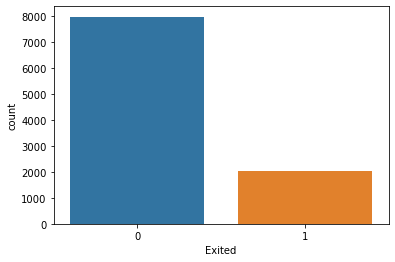

<Figure size 432x288 with 0 Axes>

In [13]:
for i in cat_variables:
    category(i)
    plt.savefig('foo.pdf')

# Analysis of Numerical Variables

In [14]:
num_variables = ["CreditScore", "Age", "Balance", "EstimatedSalary"]

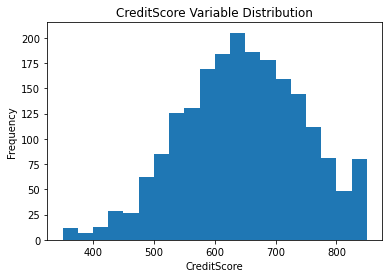

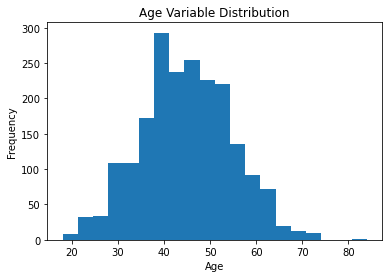

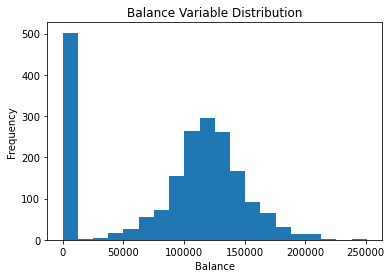

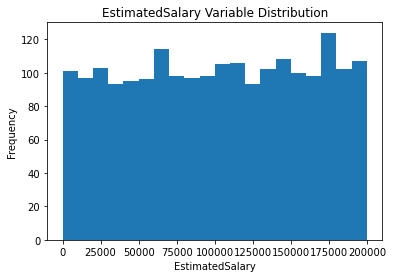

In [15]:
def numeric(variable):
    plt.hist(exit[variable], bins = 20)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} Variable Distribution".format(variable))
    plt.show()
    
for i in num_variables:
    numeric(i)

**Heatmap**

<AxesSubplot:>

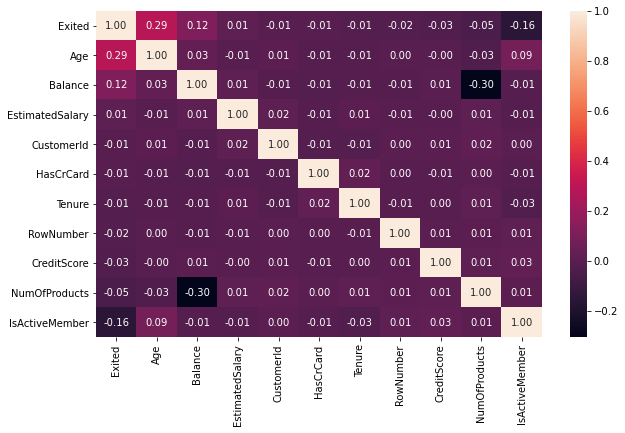

In [16]:
k = 13
col = df.corr().nlargest(k, 'Exited')['Exited'].index
corr = df[col].corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, linecolor = "black", fmt='.2f')

<AxesSubplot:>

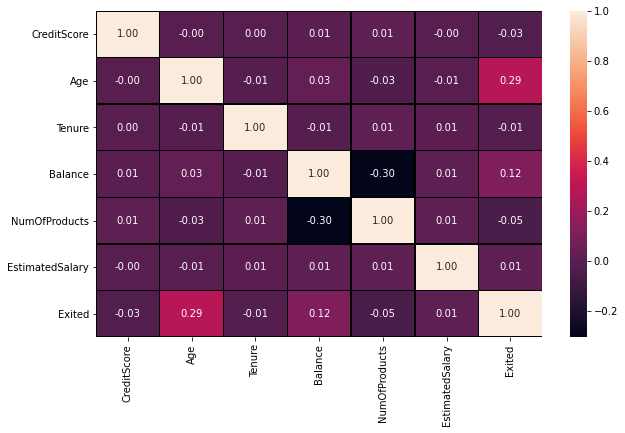

In [17]:
list_corr = ["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary","Exited"]
plt.figure(figsize=(10,6))
sns.heatmap(df[list_corr].corr(), annot = True, linecolor = "black", lw = 0.5, fmt= '.2f') 

# Save plots for presentation

No handles with labels found to put in legend.


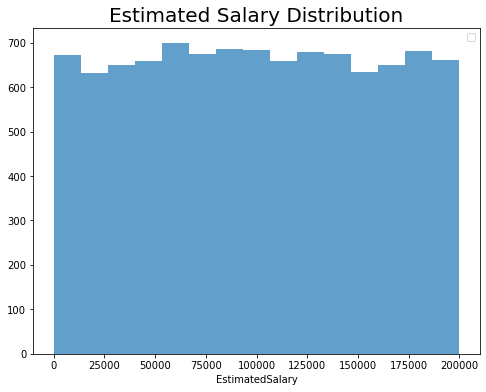

In [18]:
plt.figure(figsize=(8,6))
plt.xlabel('EstimatedSalary')
plt.hist(df["EstimatedSalary"],bins=15, alpha=0.7)
plt.legend(loc='upper right')
plt.title("Estimated Salary Distribution", fontsize=20)
plt.savefig("EstimatedSalary.png")
plt.show()


No handles with labels found to put in legend.


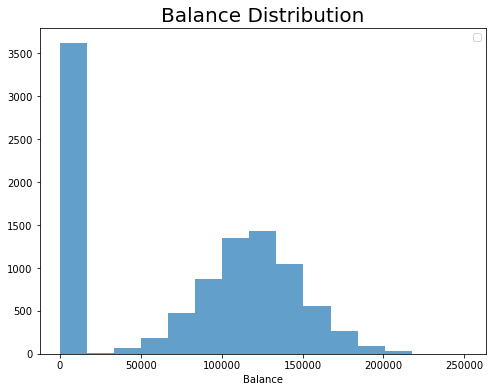

In [19]:
# distribution of the Balance for not_churn
plt.figure(figsize=(8,6))
plt.xlabel('Balance')
plt.hist(df["Balance"],bins=15, alpha=0.7)
plt.title ("Balance Distribution", fontsize=20)
plt.legend(loc='upper right')
plt.savefig("Balance.png")
plt.show()

# Dummy Variables

In [20]:
# Create new dataframe with dummy features
df = pd.get_dummies(df, columns=['Geography', 'Gender'])

# Display first 10 rows
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
5,6,15574012,Chu,645,44,8,113755.78,2,1,0,149756.71,1,0,0,1,0,1
6,7,15592531,Bartlett,822,50,7,0.00,2,1,1,10062.80,0,1,0,0,0,1
7,8,15656148,Obinna,376,29,4,115046.74,4,1,0,119346.88,1,0,1,0,1,0
8,9,15792365,He,501,44,4,142051.07,2,0,1,74940.50,0,1,0,0,0,1
9,10,15592389,H?,684,27,2,134603.88,1,1,1,71725.73,0,1,0,0,0,1


# Feature Engineering

In [21]:
#Credit Score Grouping

def credit_score_table(row):
    
    credit_score = row.CreditScore
    if credit_score >= 300 and credit_score < 500:
        return "1"
    elif credit_score >= 500 and credit_score < 601:
        return "2"
    elif credit_score >= 601 and credit_score < 661:
        return "3"
    elif credit_score >= 661 and credit_score < 781:
        return "4"
    elif credit_score >= 781 and credit_score < 851:
        return "5"
    elif credit_score >= 851:
        return "6"
    elif credit_score < 300:
        return "0"

In [22]:
#Number of products by tenure

def product_utilization_by_year(row):
    number_of_products = row.NumOfProducts
    tenure = row.Tenure
    
    if number_of_products == 0:
        return 0
    
    if tenure == 0:
        return number_of_products
    
    rate = number_of_products / tenure
    return rate

In [23]:
#Number of products by salary

def estimated_salary_by_product(row):
    number_of_products = row.NumOfProducts
    estimated_salary = row.EstimatedSalary
    
    if number_of_products == 0:
        return 0
    
    rate = estimated_salary / number_of_products 
    return rate

In [24]:
df['CreditScoreTable'] = df.apply(lambda row: credit_score_table(row), axis=1)
df['ProductsbyYear'] = df.apply(lambda row: product_utilization_by_year(row), axis=1)
df['SalarybyProduct'] = df.apply(lambda row: estimated_salary_by_product(row), axis=1)
df["NewTenure"] = df["Tenure"]/df["Age"]

In [25]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,CreditScoreTable,ProductsbyYear,SalarybyProduct,NewTenure
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,...,1,1,0,0,1,0,3,0.500,101348.880,0.047619
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,...,0,0,0,1,1,0,3,1.000,112542.580,0.024390
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,...,1,1,0,0,1,0,2,0.375,37977.190,0.190476
3,4,15701354,Boni,699,39,1,0.00,2,0,0,...,0,1,0,0,1,0,4,2.000,46913.315,0.025641
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,...,0,0,0,1,1,0,5,0.500,79084.100,0.046512


<AxesSubplot:>

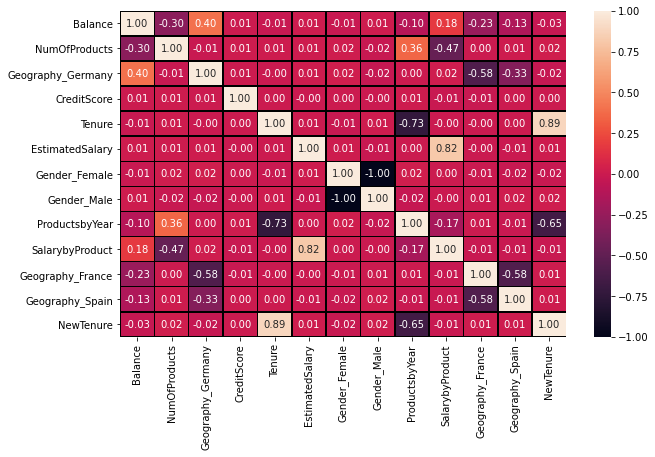

In [26]:
list_corr = ['Balance', 'NumOfProducts','Geography_Germany', 'CreditScore', 'Tenure', 
            'EstimatedSalary','Gender_Female', 'Gender_Male', 'CreditScoreTable',
            'ProductsbyYear', 'SalarybyProduct','Geography_France', 'Geography_Spain','NewTenure']
plt.figure(figsize=(10,6))
sns.heatmap(df[list_corr].corr(), annot = True, linecolor = "black", lw = 0.5, fmt= '.2f') 

# Scaling

# Models

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import xgboost as xgb
from sklearn.metrics import average_precision_score
from sklearn import svm, datasets
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

**Train Test Split**

In [28]:
y = df['Exited'].copy()

In [29]:
#feature selection!
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
                'EstimatedSalary', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 
                'Gender_Female','Gender_Male',]

X = df[features].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=2019)

**Gradient Boosting**

In [30]:
gb = GradientBoostingClassifier().fit(X_train, y_train)

In [31]:
feat_importance = pd.DataFrame(
    gb.feature_importances_,
    
    columns=['Importance'], index=features)

In [65]:
feat_importance = feat_importance.sort_values(by=['Importance'], ascending=True)

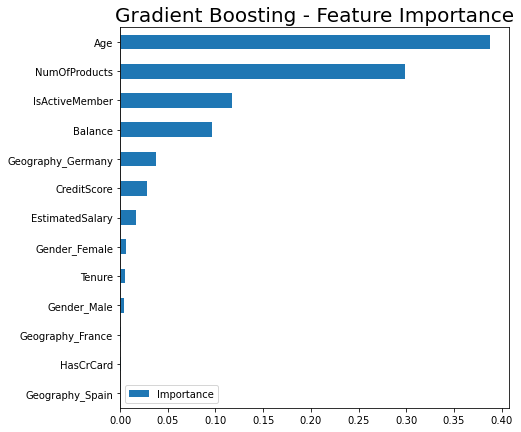

In [66]:
#plotting the coefficients to better visualize which features are affecting the salary (or y) more
feat_importance.plot(kind='barh', figsize=(9, 7))
plt.title('Gradient Boosting - Feature Importance', fontsize=20)
plt.axvline(x=0, color='.5')
plt.subplots_adjust(left=.3)
plt.savefig("Feature_importance.png")

Feature: 0, Score: 0.02804
Feature: 1, Score: 0.38816
Feature: 2, Score: 0.00524
Feature: 3, Score: 0.09646
Feature: 4, Score: 0.29856
Feature: 5, Score: 0.00051
Feature: 6, Score: 0.11754
Feature: 7, Score: 0.01645
Feature: 8, Score: 0.00141
Feature: 9, Score: 0.03762
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00640
Feature: 12, Score: 0.00361


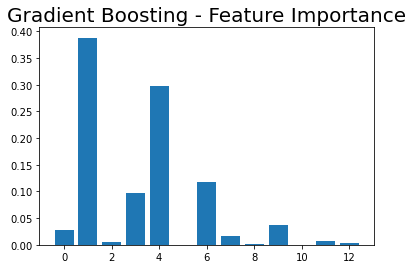

In [34]:
#feature importance
importance = gb.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.title("Gradient Boosting - Feature Importance", fontsize = 20)
plt.show()

**Decision Tree**

In [35]:
dt = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.45670
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.38738
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.15592
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000


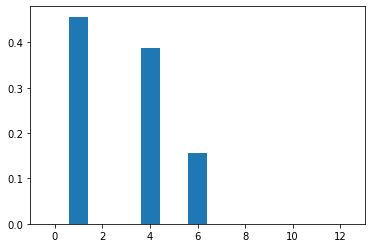

In [36]:
#feature importance
importance = dt.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [37]:
#accuracy
predictions = dt.predict(X_test)

accuracy_score(y_true = y_test, y_pred = predictions)

0.8512

In [38]:
#precision and recall
y_predict = dt.predict(X_test)
print("Default Threshold")
print("Precision: {:6.4f}, Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                   recall_score(y_test, y_predict)))

Default Threshold
Precision: 0.7329, Recall: 0.4369


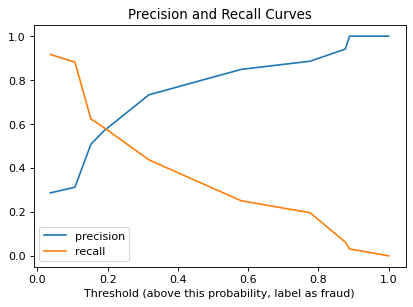

In [39]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, dt.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

In [40]:
# F1 Score
y_predict_dt = dt.predict(X_test)
f1_score(y_test, y_predict_dt)

0.5474452554744526

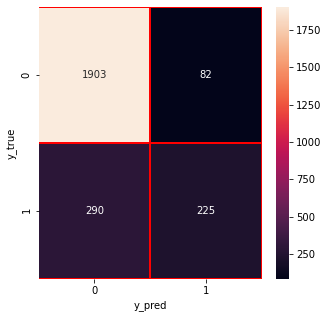

In [41]:
y_pred = dt.predict(X_test)
y_true = y_test

cm =confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

**KNN Model**

In [42]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train,y_train)
knn_model

KNeighborsClassifier()

In [43]:
#accuracy
y_pred = knn_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.7564

In [44]:
#precision and recall
y_predict = knn.predict(X_test)
print("Default Threshold")
print("Precision: {:6.4f}, Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                   recall_score(y_test, y_predict)))

Default Threshold
Precision: 0.2062, Recall: 0.0641


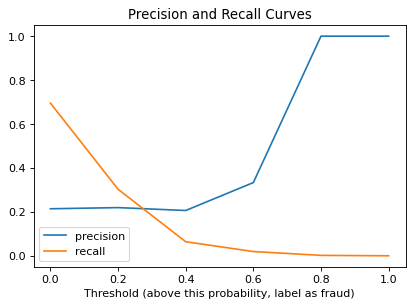

In [45]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, knn.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

In [46]:
# F1 Score
y_predict = knn.predict(X_test)
f1_score(y_test, y_predict)

0.09777777777777778

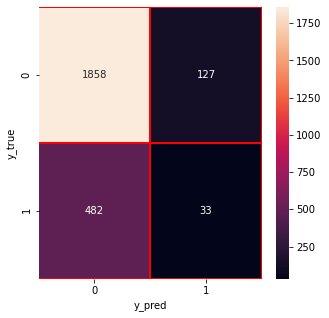

In [47]:
y_pred = knn_model.predict(X_test)
y_true = y_test

cm =confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

**Logistic Regression**

In [48]:
log = LogisticRegression(solver = "liblinear")
log.fit(X_train,y_train)
log

LogisticRegression(solver='liblinear')

In [49]:
log.intercept_

array([-0.00036203])

In [50]:
log.coef_

array([[-5.11729394e-03,  4.59160291e-02, -3.05774224e-03,
         3.20783530e-06, -6.43628383e-04, -2.03874773e-04,
        -2.22652897e-03, -1.21597489e-06, -1.35626313e-03,
         1.35988039e-03, -3.65651697e-04,  1.03841145e-03,
        -1.40044589e-03]])

In [51]:
print("{}".format(log.score(X_test,y_test)))

0.7888


In [52]:
y_pred_log = log.predict(X_test)
accuracy_score(y_test, y_pred_log)

0.7888

In [53]:
cross_val_score(log, X_test, y_test, cv = 10).mean()

0.7884

In [54]:
#precision and recall
print("Default Threshold")
print("Precision: {:6.4f}, Recall: {:6.4f}".format(precision_score(y_test, y_pred_log), 
                                                   recall_score(y_test, y_pred_log)))

Default Threshold
Precision: 0.4198, Recall: 0.0660


In [55]:
# F1 Score
y_predict = log.predict(X_test)
f1_score(y_test, y_predict)

0.11409395973154363

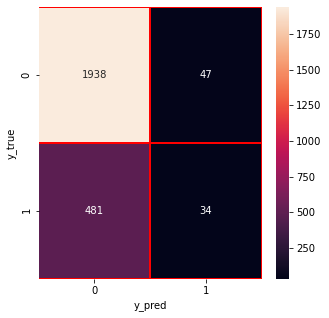

In [56]:
y_pred = log.predict(X_test)
y_true = y_test

cm =confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

**Random Forest**

In [57]:
rf = RandomForestClassifier().fit(X_train, y_train)

In [58]:
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8636

In [59]:
#precision and recall
y_predict = rf.predict(X_test)
print("Default Threshold")
print("Precision: {:6.4f}, Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                   recall_score(y_test, y_predict)))

Default Threshold
Precision: 0.7900, Recall: 0.4602


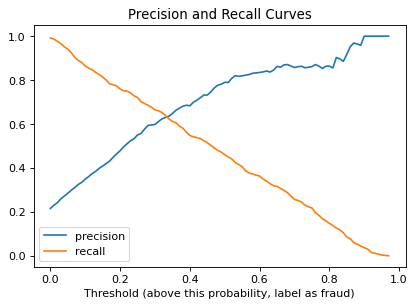

In [60]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, rf.predict_proba(X_test)[:,1] )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

In [61]:
# F1 Score
y_predict = rf.predict(X_test)
f1_score(y_test, y_predict)

0.5815950920245399

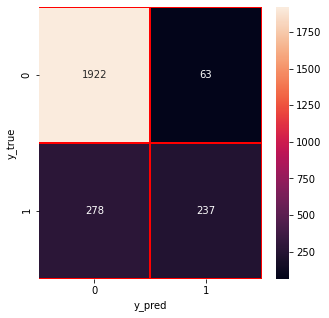

In [62]:
y_pred = rf.predict(X_test)
y_true = y_test

cm =confusion_matrix(y_true,y_pred)

f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [63]:
models = [
    knn_model,
    log,
    rf,
    dt,
]


for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print("-"*28)
    print(names + ":" )
    print("Accuracy: {:.4%}".format(accuracy))
    print("Precision: {:6.4f}".format(precision))
    print("Recall: {:6.4f}".format(recall))

----------------------------
KNeighborsClassifier:
Accuracy: 75.6400%
Precision: 0.2062
Recall: 0.0641
----------------------------
LogisticRegression:
Accuracy: 78.8800%
Precision: 0.4198
Recall: 0.0660
----------------------------
RandomForestClassifier:
Accuracy: 86.3600%
Precision: 0.7900
Recall: 0.4602
----------------------------
DecisionTreeClassifier:
Accuracy: 85.1200%
Precision: 0.7329
Recall: 0.4369


# ROC Curve

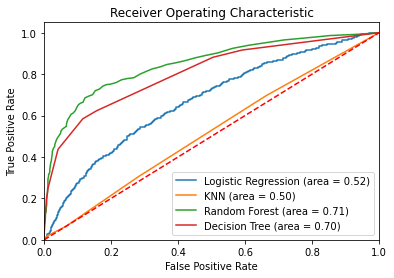

In [64]:
#logistic regression
logistic_roc_auc = roc_auc_score(y_test, log.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log.predict_proba(X_test)[:,1])

#knn
knn_roc_auc = roc_auc_score(y_test, knn_model.predict(X_test))
knn_fpr, knn_tpr, knn_thresholds = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1])

#Random Forest
rf_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])

#Decision Tree
dt_roc_auc = roc_auc_score(y_test, dt.predict(X_test))
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])

#XG Boost
#xg_roc_auc = roc_auc_score(y_test, xg.predict(X_test))
#xg_fpr, xg_tpr, xg_thresholds = roc_curve(y_test, xg.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logistic_roc_auc)
plt.plot(knn_fpr, knn_tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
#plt.plot(xt_fpr, xg_tpr, label='XG Boost (area = %0.2f)' % xg_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()